# SREELEKSHMY A - 20MAI0017

https://github.com/sreelekshmyanil/DL-Assignments---VIT

# ACTIVATION FUNCTIONS

In [37]:
#necessary packages
import numpy as np
import matplotlib.pyplot as plt 

In [38]:
#input
ex = np.linspace(-10, 10) 

In [39]:
ex

array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
        -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
        -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
        -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
        -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
        -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
        -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
         1.42857143,   1.83673469,   2.24489796,   2.65306122,
         3.06122449,   3.46938776,   3.87755102,   4.28571429,
         4.69387755,   5.10204082,   5.51020408,   5.91836735,
         6.32653061,   6.73469388,   7.14285714,   7.55102041,
         7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
         9.59183673,  10.        ])

1. Sigmoid

It is one of the most widely used non-linear activation function. 
Sigmoid transforms the values between the range 0 and 1.

In [40]:
def sigmoid_function(x):
    z = (1/(1 + np.exp(-x)))
    return z

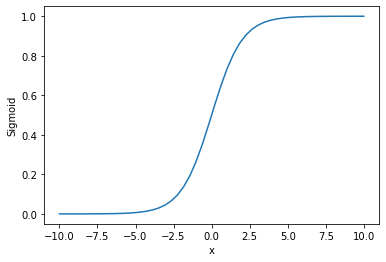

In [41]:
z = sigmoid_function(ex)
plt.plot(ex, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid") 
plt.show() 

2. Tanh

The tanh function is very similar to the sigmoid function. 
The only difference is that it is symmetric around the origin. The range of values in this case is from -1 to 1. 
Thus the inputs to the next layers will not always be of the same sign. 

In [42]:
def tanh_function(x):
    z = (2/(1 + np.exp(-2*x))) -1
    return z

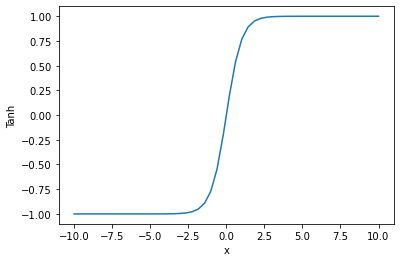

In [43]:
z = tanh_function(ex)
plt.plot(ex, z) 
plt.xlabel("x") 
plt.ylabel("Tanh") 
plt.show() 

3. Relu 

ReLU stands for Rectified Linear Unit. 
The main advantage of using the ReLU function over other activation functions is that 
it does not activate all the neurons at the same time.

This means that the neurons will only be deactivated if the output of the linear transformation is less than 0.

In [44]:
def relu_function(x):
    return max(0, x)

In [45]:
z = [relu_function(x) for x in ex]
plt.plot(ex, z) 
plt.xlabel("x") 
plt.ylabel("ReLU") 
plt.show() 

4. Leaky Relu

Leaky ReLU function is nothing but an improved version of the ReLU function. 
As we saw that for the ReLU function, the gradient is 0 for x<0, 
which would deactivate the neurons in that region.

Leaky ReLU is defined to address this problem. Instead of defining the Relu function as 0 for negative values of x,
we define it as an extremely small linear component of x. 

In [46]:
leaky_relu = np.vectorize(lambda x: max(0.1 * x, x), otypes=[np.float])

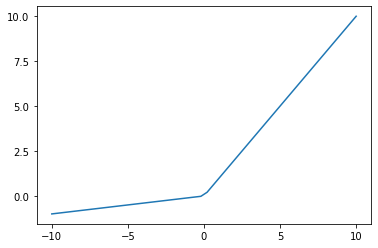

In [47]:
plt.locator_params(nbins=5)
plt.plot(ex, leaky_relu(ex))

5. ELU

With Exponential Linear Units (ELU), we can have a mean activation that is close to 0 and it is an exponential function.
ELU does not saturate for large values of x.

In [48]:
def elu(arr, alpha):
    a = []
    for x in arr:
        if x >= 0:
            a.append(x)
        else:
            a.append(alpha * (np.exp(x)-1))
    return a

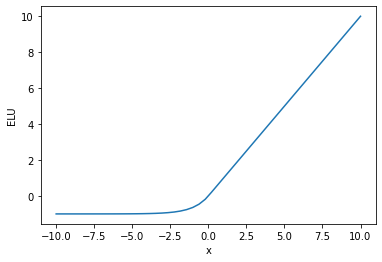

In [49]:
elu1 = elu(ex, 1.0)
plt.plot(ex, elu1)
plt.xlabel('x')
plt.ylabel('ELU')
plt.show()

___________________________________________________________________________________________________________________________

# CONVOLUTION

2D Convolutions are instrumental when creating convolutional neural networks 
or just for general image processing filters such as blurring, sharpening, edge detection, and many more. 
They are based on the idea of using a kernel and iterating through an input image to create an output image.

In [50]:
#Packages
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#Load image and convert to gray scale
image = r"C:\Users\sree\Desktop\testimage.jpeg"
image = cv2.imread(image,0) 

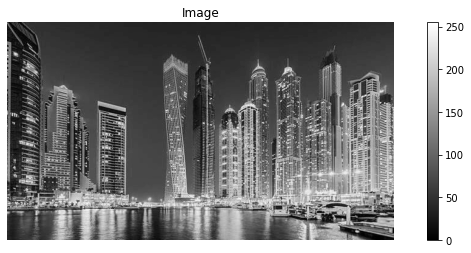

In [52]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(12, 4),
                               sharex=True, sharey=True)

img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)

plt.show()

In [53]:
print(type(image))
print("Image dimension ",image.shape)

<class 'numpy.ndarray'>
Image dimension  (359, 638)


In [54]:
def convolve2D(image, kernel, padding, strides):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break
    return output

# 1. Filter size : 3*3 Kernel

In [55]:
#Kernel 3*3
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [56]:
print( kernel, 'is the kernel used') 

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]] is the kernel used


In [57]:
op = convolve2D(image, kernel, 0, 1)

In [58]:
cv2.imshow('Convolution', op) 
cv2.waitKey() 
cv2.destroyAllWindows() 

# Filter size : 5*5 Kernel

In [59]:
kernel = np.array([[0, -1,-1,-1, 0], [-1, 5,5,5, -1],[-1, 5,5,5, -1],[-1, 5,5,5, -1], [0, -1,-1,-1, 0]])

In [60]:
print( kernel, 'is the kernel used') 

[[ 0 -1 -1 -1  0]
 [-1  5  5  5 -1]
 [-1  5  5  5 -1]
 [-1  5  5  5 -1]
 [ 0 -1 -1 -1  0]] is the kernel used


In [61]:
op = convolve2D(image, kernel, 0, 1)

In [62]:
cv2.imshow('Convolution', op) 
cv2.waitKey() 
cv2.destroyAllWindows() 

# 2. Stride 2

In [63]:
#5*5 kernel
op = convolve2D(image, kernel, 0, 2)

In [64]:
cv2.imshow('Convolution 5x5 stride 2', op) 
cv2.waitKey() 
cv2.destroyAllWindows() 

In [65]:
#Kernel 3*3
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
op = convolve2D(image, kernel, 0, 2)
cv2.imshow('Convolution 3x3 stride 2', op) 
cv2.waitKey() 
cv2.destroyAllWindows() 

# 3. Stride 1 zero-padding

In [66]:
#Kernel 3*3
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
op = convolve2D(image, kernel, 1, 1)
cv2.imshow('Convolution 3x3 stride 1 zero padded', op) 
cv2.waitKey() 
cv2.destroyAllWindows() 

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  78.  81. ...  44.  44.   0.]
 [  0. 141.  86. ...  44.  44.   0.]
 ...
 [  0.  39.  37. ...   5.   3.   0.]
 [  0.  40.  37. ...  20.  17.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [67]:
#Kernel 5*5
kernel = np.array([[0, -1,-1,-1, 0], [-1, 5,5,5, -1],[-1, 5,5,5, -1],[-1, 5,5,5, -1], [0, -1,-1,-1, 0]])
op = convolve2D(image, kernel, 1, 1)
cv2.imshow('Convolution 3x3 stride 1 zero padded', op) 
cv2.waitKey() 
cv2.destroyAllWindows() 

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  78.  81. ...  44.  44.   0.]
 [  0. 141.  86. ...  44.  44.   0.]
 ...
 [  0.  39.  37. ...   5.   3.   0.]
 [  0.  40.  37. ...  20.  17.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


# 4. Metrics

In a nutshell, the entropy function gives a value that represents level of complexity in a certain section of an image. 
The resulting values are of course subject to the initial structuring element we chose.

In information theory, information entropy is the log-base-2 of the number of possible outcomes for a message.

For an image, local entropy is related to the complexity contained in a given neighborhood, typically defined by a structuring element. 
The entropy filter can detect subtle variations in the local gray level distribution.

In [68]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

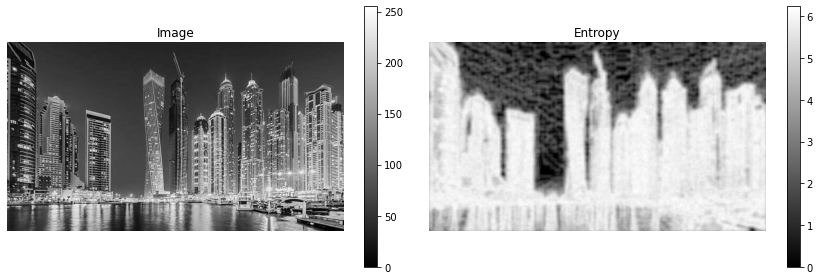

In [69]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)

img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)
img1 = ax1.imshow(entropy(image, disk(5)), cmap='gray')
ax1.set_title("Entropy")
ax1.axis("off")
fig.colorbar(img1, ax=ax1)

fig.tight_layout()

plt.show()

The average level of "information"

In [70]:
from skimage.measure.entropy import shannon_entropy  
entropy = shannon_entropy(image)

In [71]:
entropy

7.531313717669519